<span style="color:MediumTurquoise "> **Verifica e Instala Pacotes** </span>

In [27]:
if(!require('dplyr')) install.packages('dplyr')
#if(!require('tm.plugin.webmining')) install.packages('tm.plugin.webmining')
if(!require('tidytext')) install.packages('tidytext')
if(!require('purrr')) install.packages('purrr')
if(!require('ggplot2')) install.packages('ggplot2')
if(!require('lexiconPT')) install.packages('lexiconPT')

Loading required package: wordcloud
Loading required package: RColorBrewer


<span style="color:MediumTurquoise"> **Carrega Bibliotecas** </span>

In [15]:
library(dplyr)
library(purrr)
library(tidytext)
library(ggplot2)
library(ggthemes)

library(lexiconPT)

library(readr)
library(stringr)
library(tidyr)

<span style="color:MediumTurquoise"> **Carrega Dados** </span>

In [8]:
raw_tale <- read_lines('a-marca-de-uma-lagrima.txt', skip = 78, n_max = 2873)
tale <- character()
for (i in seq_along(raw_tale)) {
        if (i%%10 == 1) tale[ceiling(i/10)] <- str_c(raw_tale[i], 
                                                     raw_tale[i+1],
                                                     raw_tale[i+2],
                                                     raw_tale[i+3],
                                                     raw_tale[i+4],
                                                     raw_tale[i+5],
                                                     raw_tale[i+6],
                                                     raw_tale[i+7],
                                                     raw_tale[i+8],
                                                     raw_tale[i+9], sep = " ")
}
tale[9:10]

[1] "Levemente, seus dedos tocaram a face fria do inimigo, bem na rachadura. Lentamente, seus dedos percorreram a rachadura, tateando como um cego que procura reconhecer alguém. — Todos riem... Mas eu não queria tantos risos. Eu queria um sorriso apenas. Um só. Queria estar quieta e ver alguém aproximar-se, olhando nos meus olhos... sorrindo... Eu sorriria de volta, e nada mais precisaria ser dito... Isabel deixou as lágrimas correrem fartas pelo rosto. Foi aí que o inimigo resolveu feri-la mais fundo e cortou-lhe o dedo com a borda da rachadura. Num gesto maquinai, a menina levou o dedo à boca, chupando o ferimento. Na rachadura, no peito do inimigo, ficou uma gota de sangue. "
[2] "\fO dedo não doía quase nada. Era ali que doía.  2 - Lindo como um deus Que cheiro bom, Rosana! Que perfume você está usando? — Deixe de besteira, Isabel. É o mesmo que o seu. Rosana estava linda, como sempre. Linda como de propósito para humilhar Isabel. Era mesmo uma beleza a casa da tia Adelaide. O que não parecia uma beleza era a própria tia Adelaide. Recebia os convidados como se ela própria estivesse fazendo dezesseis anos. E o pior é que estava' vestida como se fizesse dezesseis anos."

<span style="color:MediumTurquoise"> **Análise de Sentimentos** </span>

In [9]:
# library(syuzhet)
tale_nrc <- cbind(linenumber = seq_along(tale), get_nrc_sentiment(tale, language = "portuguese"))

In [10]:
tale_nrc$negative <- -tale_nrc$negative
pos_neg <- tale_nrc %>% select(linenumber, positive, negative) %>% 
        melt(id = "linenumber")
names(pos_neg) <- c("linenumber", "sentiment", "value")

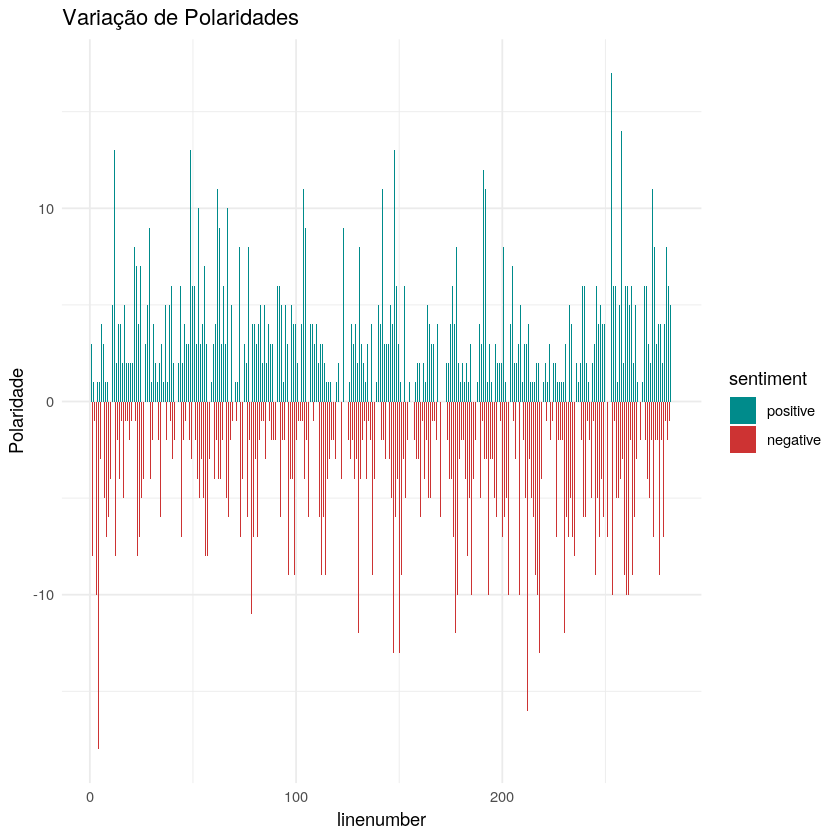

In [18]:
ggplot(data = pos_neg, aes(x = linenumber, y = value, fill = sentiment)) +
        geom_bar(stat = 'identity', position = position_dodge()) + theme_minimal() +
        ylab("Polaridade") + 
        ggtitle("Variação de Polaridades") +
  scale_color_manual(values = c("darkcyan", "brown3")) +
  scale_fill_manual(values = c("darkcyan", "brown3"))

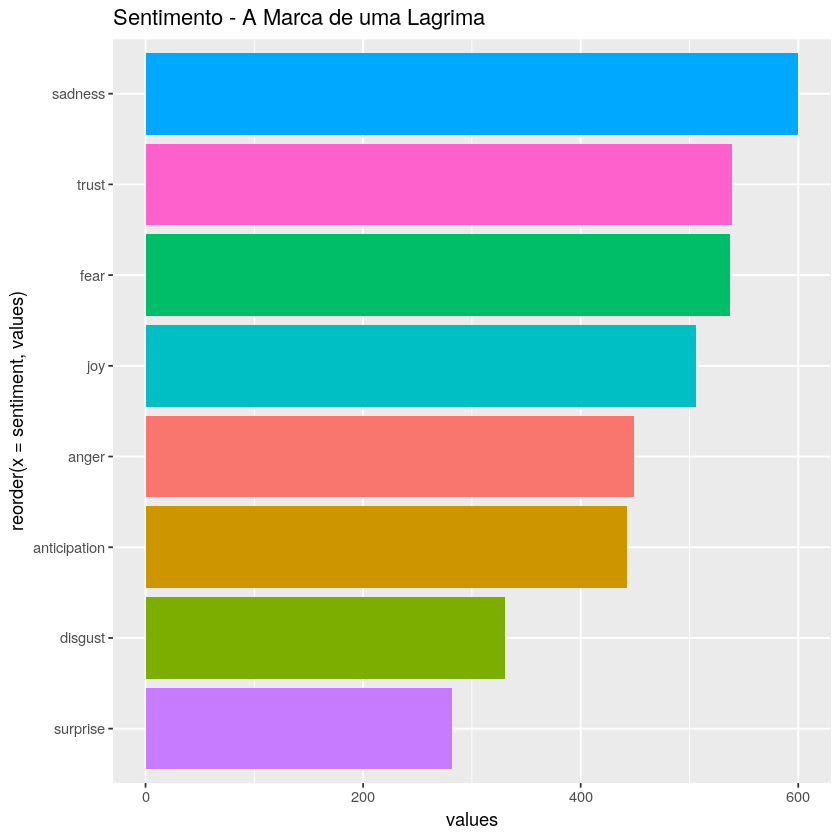

In [12]:
emotions <- tale_nrc %>% select(linenumber, anger, anticipation, 
                                      disgust, fear, joy, sadness, surprise, 
                                      trust) %>% 
        melt(id = "linenumber")
names(emotions) <- c("linenumber", "sentiment", "value")
emotions_group <- group_by(emotions, sentiment)
by_emotions <- summarise(emotions_group, 
                         values=sum(value))
ggplot(aes(reorder(x=sentiment, values), y=values, fill=sentiment), data = by_emotions) +
  geom_bar(stat = 'identity') + ggtitle('Sentimento - A Marca de uma Lagrima') +
  coord_flip() + theme(legend.position="none")